In [14]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

df = pd.read_csv("Z:/csv/base_datos_2008.csv", nrows=100000)
df = df[['ArrDelay','DepDelay','Distance','AirTime']].dropna()

#covid data useless for this example

#df = pd.read_csv("Z:/csv/casos_diagnostico_ccaa.csv")
#df = df[['fecha','num_casos','nun_casos_prueba_pcr','nun_casos_prueba_ag']].dropna()

# following lines to avoid error 'value not in index'
#columns = ['num_casos','nun_casos_prueba_pcr','nun_casos_prueba_ag']
#df = df.reindex(columns=columns)
#df.fillna(0, inplace=True)
#df[columns] = df[columns].astype(int)

In [15]:
x_scaled = preprocessing.scale(df)
x_scaled

array([[-0.63713243, -0.08247884,  0.40657043,  0.4452521 ],
       [-0.12045009,  0.3068154 ,  0.40657043,  0.38990966],
       [ 0.26706167, -0.08247884, -0.26709367, -0.29264705],
       ...,
       [ 1.84940134,  2.18250582,  0.53445243,  0.31611975],
       [ 0.17018373,  0.37759617,  0.53445243,  0.1869874 ],
       [ 0.17018373, -0.25943077,  0.53445243,  0.22388235]])

In [16]:
x_scaled.mean(axis=0)

array([2.47651119e-17, 1.07267490e-17, 1.19506063e-16, 1.01364179e-16])

In [17]:
x_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [18]:
df.iloc[2]

ArrDelay     14.0
DepDelay      8.0
Distance    515.0
AirTime      76.0
Name: 2, dtype: float64

In [19]:
x_scaled[2] #compare with the previous one

array([ 0.26706167, -0.08247884, -0.26709367, -0.29264705])

In [20]:
min_max_scaler = preprocessing.MinMaxScaler([0,10])
x_train_minmax = min_max_scaler.fit_transform(df)
x_train_minmax

array([[0.77199282, 0.92857143, 3.15557514, 2.91316527],
       [1.05924596, 1.125     , 3.15557514, 2.82913165],
       [1.27468582, 0.92857143, 1.85544293, 1.79271709],
       ...,
       [2.15439856, 2.07142857, 3.4023799 , 2.71708683],
       [1.22082585, 1.16071429, 3.4023799 , 2.5210084 ],
       [1.22082585, 0.83928571, 3.4023799 , 2.57703081]])

In [21]:
df = pd.read_csv("Z:/csv/base_datos_2008.csv", nrows=100)
pd.get_dummies(df['Origin'])

,IAD,IND,ISP,JAN,JAX,LAS
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
95,0,0,0,0,0,1
96,0,0,0,0,0,1
97,0,0,0,0,0,1
98,0,0,0,0,0,1


In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("Z:/csv/base_datos_2008.csv", nrows=1e5)
newdf = df[['AirTime','DepDelay']].dropna()

In [25]:
kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=-1).fit(newdf)
kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([1, 1, 2, ..., 0, 1, 1])

In [26]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([ 3963, 26055, 60384,  8296], dtype=int64))

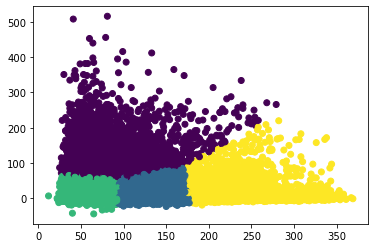

In [28]:
plt.scatter(newdf['AirTime'],newdf['DepDelay'],c=kmeans.labels_)
plt.show()

In [29]:
kmeans.cluster_centers_

array([[ 79.43978926, 116.1144004 ],
       [128.05041598,   5.11923475],
       [ 58.86808581,   5.6399238 ],
       [224.66299613,  10.01851404]])

In [31]:
alldf = pd.read_csv("Z:/csv/base_datos_2008.csv", nrows=1e6)[['AirTime','DepDelay']].dropna()

In [32]:
kmeans.predict(alldf)[0:50]

array([1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 0, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0])

In [33]:
newdf = df[['AirTime','Distance','TaxiOut','ArrDelay','DepDelay']].dropna()

In [36]:
kmeans = KMeans(n_clusters=10, random_state=0, n_jobs=-1).fit(newdf)
kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([7, 7, 9, ..., 7, 7, 7])

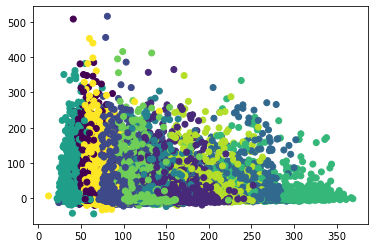

In [37]:
plt.scatter(newdf['AirTime'],newdf['DepDelay'],c=kmeans.labels_)
plt.show()

In [38]:
kmeans.cluster_centers_

array([[5.54795906e+01, 3.34334447e+02, 1.04492584e+01, 8.24959265e+00,
        1.06694381e+01],
       [1.58521405e+02, 1.17762123e+03, 1.15194318e+01, 1.66265536e+00,
        9.68376406e+00],
       [9.13542006e+01, 6.23191451e+02, 1.09501978e+01, 4.40764875e+00,
        1.01971143e+01],
       [2.28022541e+02, 1.77902664e+03, 1.14142760e+01, 3.27868852e+00,
        1.31400273e+01],
       [1.37551778e+02, 9.99117547e+02, 1.11732479e+01, 2.38232218e-01,
        8.51346757e+00],
       [4.24426563e+01, 2.24052041e+02, 1.09173758e+01, 8.22339376e+00,
        9.74374152e+00],
       [2.69355758e+02, 2.12915455e+03, 1.26860606e+01, 7.01212121e-01,
        1.37684848e+01],
       [1.16197361e+02, 8.21700575e+02, 1.11186422e+01, 1.76936957e+00,
        8.60730800e+00],
       [1.91286319e+02, 1.46655407e+03, 1.14405266e+01, 2.35237424e+00,
        1.16060179e+01],
       [6.96420134e+01, 4.49293674e+02, 1.08002363e+01, 8.60952881e+00,
        1.13973619e+01]])